In [1]:
%ls commercial_store/

소상공인시장진흥공단_상가업소정보_201806_01.csv
소상공인시장진흥공단_상가업소정보_201806_02.csv
소상공인시장진흥공단_상가업소정보_201806_03.csv
소상공인시장진흥공단_상가업소정보_201806_04.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from plotnine import *
import folium

In [4]:
shop_2018 = pd.read_csv('commercial_store/소상공인시장진흥공단_상가업소정보_201806_01.csv', encoding='cp949')
shop_2018.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284
1,28498271,비비안아울렛중계점,아울렛중계점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1135010600105090000010511,2001아울렛,서울특별시 노원구 동일로204가길 46,139726,1783.0,NaN,3,NaN,127.067888,37.641280
2,28512174,연세정신건강의학과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,1111017400102990000005842,유림문화사,서울특별시 종로구 종로 335-3,110540,3104.0,NaN,2,NaN,127.014500,37.573196
3,28499926,독일지멘스보청기은평점,은평점,D,소매,D20,의약/의료품소매,D20A02,보청기판매,G47812,...,1138010300102810108040063,NaN,서울특별시 은평구 통일로 732,122040,3368.0,NaN,2,NaN,126.929871,37.610888
4,28490321,서울모드,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010700105170027011767,SM빌딩,서울특별시 강남구 도산대로11길 29,135888,6034.0,NaN,1,NaN,127.022212,37.519315


In [5]:
shop_2018.shape

(476183, 39)

In [6]:
# 커피 전문점 숫자(특정 업체, 브랜드명 검색)
coffee = shop_2018[shop_2018["상권업종소분류명"].str.contains('커피')]
coffee.shape

(18759, 39)

In [7]:
coffee.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [8]:
# 상호명으로 13472개가 있다.
coffee["상호명"].unique().shape

(13472,)

In [9]:
coffee['상호명'].value_counts()

이디야커피              459
스타벅스               308
간단하지만특별한화피디Cafe    191
투썸플레이스             129
커피빈                125
엔제리너스              103
쥬씨                  93
할리스커피               92
탐앤탐스                85
빽다방                 84
카페베네                81
요거프레소               80
커피베이                78
공차                  72
커피에반하다              63
파스쿠찌                55
커피나무                53
쥬스식스                53
토프레소                47
컴포즈커피               42
더벤티                 40
커피마마                38
메가커피                37
설빙                  35
더카페                 31
할리스                 29
마리웨일237             28
셀렉토커피               25
더치앤빈                25
커피니                 24
                  ... 
삼맛호오떡                1
금호문화재단               1
이누                   1
가비아노피우               1
탐앤탐스공릉역점             1
위드파오                 1
카페12-7               1
커피스놉                 1
엠엠티에이치123            1
사르르녹다                1
Bear-presso          1
MR.콩                 1
고디바광화문점    

In [10]:
coffee.loc[coffee["상호명"] == '스타벅스', '상호명']

12543     스타벅스
13302     스타벅스
31378     스타벅스
34199     스타벅스
34328     스타벅스
34354     스타벅스
35013     스타벅스
35237     스타벅스
39290     스타벅스
40083     스타벅스
40469     스타벅스
41603     스타벅스
41914     스타벅스
42502     스타벅스
42604     스타벅스
42955     스타벅스
43028     스타벅스
44123     스타벅스
44379     스타벅스
44449     스타벅스
44600     스타벅스
44814     스타벅스
45595     스타벅스
46006     스타벅스
46809     스타벅스
46976     스타벅스
47067     스타벅스
47275     스타벅스
48047     스타벅스
48945     스타벅스
          ... 
424246    스타벅스
427381    스타벅스
429539    스타벅스
430495    스타벅스
449443    스타벅스
450254    스타벅스
450987    스타벅스
451199    스타벅스
453458    스타벅스
453722    스타벅스
454874    스타벅스
456768    스타벅스
457490    스타벅스
457915    스타벅스
459330    스타벅스
460639    스타벅스
462406    스타벅스
462528    스타벅스
464852    스타벅스
465537    스타벅스
466414    스타벅스
468463    스타벅스
470132    스타벅스
470389    스타벅스
470523    스타벅스
472000    스타벅스
472654    스타벅스
472976    스타벅스
474313    스타벅스
474530    스타벅스
Name: 상호명, Length: 308, dtype: object

In [11]:
# coffee.loc[coffee['상호명'].str.contains('스타벅스'), '상호명']
# 위의 코드는 지점이 안 써있는 매장도 있기 때문에 아래처럼 유니크한 이름으로 정렬
coffee.loc[coffee['상호명'].str.contains('스타벅스'), '상호명'].unique()


array(['스타벅스종로3가점', '스타벅스커피여의도IFC1F', '스타벅스', '스타벅스신림사거리점', '스타벅스커피홍대역',
       '스타벅스새문안로점', '스타벅스올림픽평화의문점', '스타벅스연신내역', '스타벅스가락시장역점', '스타벅스외대점',
       '스타벅스연세백양로점', '스타벅스명지대점', '스타벅스석촌역', '스타벅스연대동문', '스타벅스압구정로데오역',
       '스타벅스서울대입구역점', '스타벅스신림점', '스타벅스강남삼성타운점', '스타벅스사당점', '스타벅스광장점',
       '스타벅스신촌명물거리점', '스타벅스명동미래', '스타벅스건국클래식점', '스타벅스연희DT점', '스타벅스삼선교점',
       '스타벅스올림픽공원북문점', '스타벅스커피여의도호성', '스타벅스충정타워', '스타벅스종각점', '스타벅스방배카페입구',
       '스타벅스이수역점', '스타벅스W-MALL점', '스타벅스천호로데오점', '스타벅스마포일진빌딩점', '스타벅스용산역점',
       '스타벅스명동메트로', '스타벅스중계역점', '스타벅스마포아크로타워점', '스타벅스남부터미널2점',
       '스타벅스중랑구청점', '스타벅스구로디지털로점', '스타벅스논현힐탑', '스타벅스종로관수점', '스타벅스삼성도심공항점',
       '스타벅스부산서면', '스타벅스종로2가점', '스타벅스선정릉역점', '스타벅스미아역점', '스타벅스선릉로점',
       '스타벅스역삼럭키', '스타벅스커피신도림디큐브시티B2', '스타벅스이태원거리점', '스타벅스구로에이스트윈타워1점',
       '스타벅스을지로입구', '스타벅스교대역점', '스타벅스서울중앙우체국점', '스타벅스남산스테이트',
       '스타벅스구로하이엔드점', '스타벅스명일이마트점', '스타벅스조선호텔후문', '스타벅스목동점', '스타벅스삼성교점',
       '스타벅스서울교대점', '스타벅스커리학동사거리점', '스타벅스강북구청사거리점', '스타벅스청담사거리점',
       '스타

In [12]:
coffee['시도명'].isnull().sum()

0

In [13]:
coffee['시도명'].unique()

array(['부산광역시', '서울특별시'], dtype=object)

In [14]:
coffee['시도명'].value_counts()

서울특별시    14662
부산광역시     4097
Name: 시도명, dtype: int64

In [15]:
coffee['시군구명'].unique()

array(['연제구', '강남구', '영등포구', '중구', '서초구', '성북구', '구로구', '종로구', '도봉구',
       '마포구', '광진구', '기장군', '남구', '서대문구', '은평구', '양천구', '해운대구', '관악구',
       '성동구', '송파구', '금천구', '사상구', '동대문구', '강서구', '금정구', '동작구', '중랑구',
       '강동구', '사하구', '북구', '용산구', '노원구', '부산진구', '강북구', '수영구', '동구',
       '동래구', '영도구', '서구'], dtype=object)

In [16]:
gangnam_and_seocho = coffee[(coffee['시군구명'] == '강남구') | (coffee['시군구명'] == '서초구')]

In [17]:
gangnam_and_seocho['시군구명'].unique()

array(['강남구', '서초구'], dtype=object)

In [18]:
coffee['상권업종중분류명'].value_counts()

커피점/카페    18759
Name: 상권업종중분류명, dtype: int64

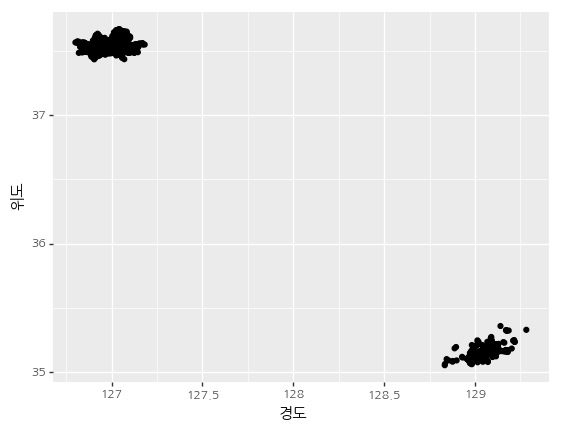

<ggplot: (-9223372036576510923)>

In [19]:
(ggplot(shop_2018[:1000])
 + aes(x='경도', y= '위도')
 + geom_point()
 + theme(text=element_text(family='NanumGothicOTF'))
)

In [20]:
shop_2018['시도명']

0         부산광역시
1         서울특별시
2         서울특별시
3         서울특별시
4         서울특별시
5         부산광역시
6         부산광역시
7         부산광역시
8         서울특별시
9         서울특별시
10        서울특별시
11        부산광역시
12        서울특별시
13        서울특별시
14        서울특별시
15        서울특별시
16        부산광역시
17        서울특별시
18        서울특별시
19        서울특별시
20        서울특별시
21        부산광역시
22        서울특별시
23        서울특별시
24        서울특별시
25        서울특별시
26        서울특별시
27        서울특별시
28        서울특별시
29        서울특별시
          ...  
476153    서울특별시
476154    서울특별시
476155    서울특별시
476156    부산광역시
476157    서울특별시
476158    서울특별시
476159    서울특별시
476160    서울특별시
476161    서울특별시
476162    서울특별시
476163    서울특별시
476164    부산광역시
476165    부산광역시
476166    서울특별시
476167    서울특별시
476168    서울특별시
476169    서울특별시
476170    서울특별시
476171    서울특별시
476172    서울특별시
476173    서울특별시
476174    서울특별시
476175    서울특별시
476176    서울특별시
476177    부산광역시
476178    서울특별시
476179    서울특별시
476180    부산광역시
476181    부산광역시
476182    서울특별시
Name: 시도명, Length: 47618

In [21]:
df_seoul = shop_2018.loc[shop_2018['시도명'].str.contains('서울')].copy()

In [22]:
df_seoul.shape

(330089, 39)

In [23]:
# 결측치 분석
df_seoul.isnull().sum()

상가업소번호            0
상호명               0
지점명          285856
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      19088
표준산업분류명       19088
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         62453
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        289290
건물관리번호            0
건물명          176500
도로명주소             0
구우편번호             0
신우편번호             2
동정보          305116
층정보           97585
호정보          283475
경도                0
위도                0
dtype: int64

In [24]:
df_seoul['상권업종대분류명'].value_counts()

음식          109766
소매          101297
생활서비스        52728
학문/교육        26294
의료           15144
부동산          12905
관광/여가/오락      9165
숙박            2744
스포츠             46
Name: 상권업종대분류명, dtype: int64

In [25]:
df_seoul.describe(include=np.object)

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,법정동명,대지구분명,지번주소,도로명,건물관리번호,건물명,도로명주소,동정보,층정보,호정보
count,330089,44233,330089,330089,330089,330089,330089,330089,311001,311001,...,330089,330089,330089,330089,330089,153589,330089,24973,232504,46614
unique,233567,15087,9,9,94,94,686,686,210,210,...,465,2,124181,11861,124735,25179,123973,914,115,2494
top,CU,본점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,...,신림동,대지,서울특별시 종로구 종로6가 262-1,서울특별시 종로구 종로,1111016400102700003012054,동대문종합시장,서울특별시 종로구 종로 266,1,1,1
freq,1450,294,109766,109766,35778,35778,23721,23721,43878,43878,...,6759,329735,976,2352,1008,1011,995,4307,161124,5469


In [26]:
df_seoul[['위도', '경도']].describe()
# mean 평균값은 지도의 중앙값을 불러온다.
# max는 지도의 가장 윗부분
# min은 지도의 가장 아랫 부분

,위도,경도
count,330089.000000,330089.000000
mean,37.545992,126.994943
std,0.049406,0.081294
min,37.434081,126.768169
25%,37.505306,126.925013
50%,37.543243,127.009046
75%,37.574720,127.055651
max,37.692398,127.182588


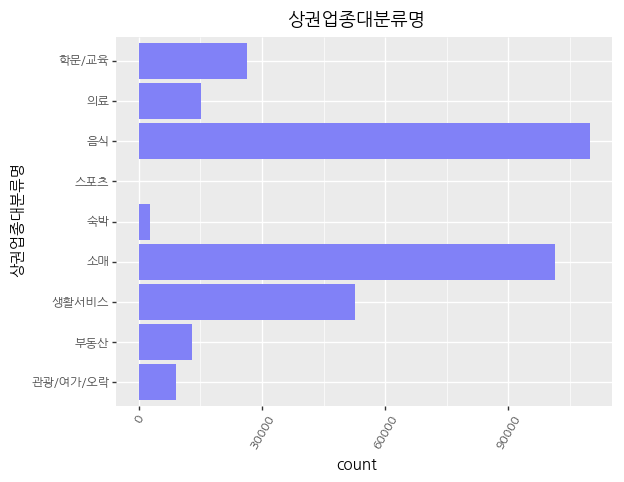

<ggplot: (-9223372036576513080)>

In [27]:
(ggplot(df_seoul)
 + aes('상권업종대분류명')
 + geom_bar(fill='#8181F7')
 + ggtitle('상권업종대분류명')
 + coord_flip()
 + theme(text=element_text(family="NanumGothicOTF"),
        axis_text_x=element_text(rotation=60))
)


In [28]:
df_food = df_seoul.loc[df_seoul['상권업종대분류명'].str.contains('음식')]
df_food.shape

(109766, 39)

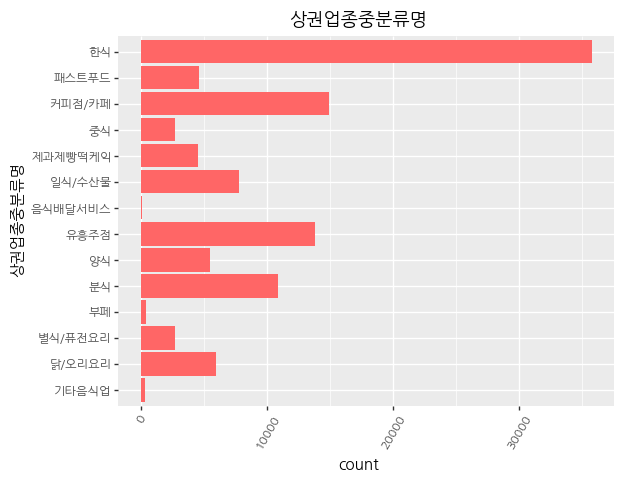

<ggplot: (292053603)>

In [29]:
(ggplot(df_food)
 + aes('상권업종중분류명')
 + geom_bar(fill='#FF6666')
 + ggtitle('상권업종중분류명')
 + coord_flip()
 + theme(text=element_text(family='NanumGothicOTF'),
         axis_text_x=element_text(rotation=60))
)

In [30]:
df_fast_food = df_food.loc[df_food['상권업종중분류명'] == '패스트푸드']
df_fast_food.shape

(4605, 39)

In [31]:
df_food.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [32]:
df_fast_food['상호명'].unique()

array(['피자마루', '롯데리아', '배스킨라빈스', ..., '브리웰', '베이크럽', '델리'], dtype=object)

In [33]:
df_fast_food['상호명'].unique().shape

(2747,)

# 베스킨라빈스와 던킨도너츠와 입지분석

In [34]:
df_31 = df_seoul.loc[df_seoul['상호명'].str.contains('베스킨라|배스킨라|던킨')].copy()
df_31['상호명'].unique(), df_31.shape

(array(['배스킨라빈스', '던킨도너츠테크노마트점', '던킨도너츠창동하나로', '던킨도너츠용산민자역사2호', '베스킨라빈슨',
        '던킨도너츠', '베스킨라빈스은행나무점', '베스킨라빈스', '코레일유통던킨도너츠점', '던킨도너츠교대점',
        '던킨도너츠건대영존점', '베스킨라빈스마들역점', '베스킨라빈스쌍문점', '코레일유통커피앤던킨도너츠',
        '배스킨라빈스강남중앙', '배스킨라빈스31', '베스킨라빈스31홈플러스시흥점', '베스킨라빈스목동2단지점',
        '던킨도너츠성신여대점', '베스킨라빈스한성대역점', '배스킨라빈스청량리역사점', '베스킨라빈스신도림테크노마트',
        '베스킨라빈스아이스크림', '베스킨라빈스미아역점', '배스킨라빈스31성내역점', '비알코리아베스킨라빈스',
        '비알코리아던킨도너츠목동', '비알코리아베스킨라빈스양', '비알코리아던킨도너츠서울', '비알코리아던킨도너츠건대',
        '비알코리아던킨도너츠고대', '비알코리아던킨도너츠서여', '비알코리아던킨도너츠은행', '비알코리아던킨도너츠두산',
        '비알코리아던킨도너츠동부', '비알코리아던킨도너츠중', '던킨도너츠합정역사점', '던킨', '던킨도너츠올림픽공원점',
        '던킨도너츠압구정소망', '던킨도넛', '던킨도너츠동대문', '배스킨라빈스성동금호점', '던킨도너츠김포국제공항점',
        '던킨도너츠보라매타운점', '배스킨라빈스방이역점', '배스킨라빈스남성역점', '던킨도너츠중앙보훈병원점',
        '배스킨라빈스교대점', '배스킨라빈스동대문홈플러스', '성북역맞이방던킨도너츠', '던킨도너츠당고개역사',
        '던킨도너츠공릉역점', '배스킨라빈스노원세이브존', '베스킨라빈스장안점', '베스킨라빈스31아이스크림',
        '베스킨라빈스삼전점', '용산역이마트배스킨라빈스', '배스킨라빈스공릉점', '던킨도너츠방화역점',
        '배스킨라빈스보라매공원점', '던킨도

## 사용할 컬럼 선정하기

In [35]:
df_31.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [36]:
df_31 = df_31[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명',
               '상권업종소분류명', '지번주소', '도로명주소', '위도', '경도', '시군구명', '행정동명']].copy()
df_31.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,지번주소,도로명주소,위도,경도,시군구명,행정동명
63,배스킨라빈스,관악구청점,음식,패스트푸드,아이스크림판매,서울특별시 관악구 봉천동 863-13,서울특별시 관악구 관악로 161,37.479599,126.952166,관악구,청룡동
1564,던킨도너츠테크노마트점,테크노마트점,음식,패스트푸드,도너츠전문,서울특별시 광진구 구의동 546-4,서울특별시 광진구 광나루로56길 85,37.535713,127.095681,광진구,구의3동
1921,던킨도너츠창동하나로,NaN,음식,패스트푸드,도너츠전문,서울특별시 도봉구 창동 1-10,서울특별시 도봉구 마들로11길 20,37.655101,127.050818,도봉구,창4동
1958,던킨도너츠용산민자역사2호,NaN,음식,패스트푸드,도너츠전문,서울특별시 용산구 한강로3가 40-999,서울특별시 용산구 한강대로21나길 7,37.527903,126.963223,용산구,한강로동
2194,베스킨라빈슨,잠실롯데캐슬점,음식,패스트푸드,아이스크림판매,서울특별시 송파구 신천동 7-18,서울특별시 송파구 올림픽로 269,37.514369,127.100565,송파구,잠실6동


In [37]:
df_31['상호명'].value_counts()

배스킨라빈스31             102
던킨도너츠                 86
베스킨라빈스                56
배스킨라빈스                44
던킨도넛                   4
베스킨라빈스아이스크림            2
비알코리아던킨도너츠두산           1
배스킨라빈스청량리역사점           1
베스킨라빈스삼전점              1
배스킨라빈스31신정네거리점         1
배스킨라빈스31성수역점           1
배스킨라빈스31위례중앙점          1
배스킨라빈스31강서구청점          1
던킨도너츠노원세이브존            1
배스킨라빈스31응암2호점          1
배스킨라빈스31성수이마트점         1
배스킨라빈스31숙명여대점          1
배스킨라빈스31대학로점           1
베스킨라빈스신림포도몰            1
배스킨라빈스31중앙대점           1
베스킨라빈스월계이마트            1
배스킨라빈스31문정역점           1
던킨도너츠답십리역점             1
던킨도너츠동대문               1
배스킨라빈스31신월신곡점          1
배스킨라빈스31선릉점            1
배스킨라빈스31동묘역점           1
베스킨라빈스목동2단지점           1
국제흥업개발던킨도너츠용산센트럴점      1
배스킨라빈스31상계백병원점         1
                    ... 
용산역이마트배스킨라빈스           1
배스킨라빈스31길음뉴타운점         1
성북역맞이방던킨도너츠            1
배스킨라빈스31연신내점           1
던킨도너츠신금호역점             1
베스킨라빈스동대문              1
베스킨라빈스마들역점             1
배스킨라빈스31개봉푸르지오점        1
배스킨라빈스영등포문래            1


In [38]:
df_31['브랜드명'] = ''

In [39]:
df_31[['상호명', '브랜드명']].head()

,상호명,브랜드명
63,배스킨라빈스,
1564,던킨도너츠테크노마트점,
1921,던킨도너츠창동하나로,
1958,던킨도너츠용산민자역사2호,
2194,베스킨라빈슨,


In [40]:
df_31.loc[df_31['상호명'].str.contains('베스킨|배스킨'), '브랜드명'] = '베스킨라빈스'
df_31.loc[df_31['상호명'].str.contains('던킨'), '브랜드명'] = '던킨도너츠'

In [41]:
 df_31.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,지번주소,도로명주소,위도,경도,시군구명,행정동명,브랜드명
63,배스킨라빈스,관악구청점,음식,패스트푸드,아이스크림판매,서울특별시 관악구 봉천동 863-13,서울특별시 관악구 관악로 161,37.479599,126.952166,관악구,청룡동,베스킨라빈스
1564,던킨도너츠테크노마트점,테크노마트점,음식,패스트푸드,도너츠전문,서울특별시 광진구 구의동 546-4,서울특별시 광진구 광나루로56길 85,37.535713,127.095681,광진구,구의3동,던킨도너츠
1921,던킨도너츠창동하나로,NaN,음식,패스트푸드,도너츠전문,서울특별시 도봉구 창동 1-10,서울특별시 도봉구 마들로11길 20,37.655101,127.050818,도봉구,창4동,던킨도너츠
1958,던킨도너츠용산민자역사2호,NaN,음식,패스트푸드,도너츠전문,서울특별시 용산구 한강로3가 40-999,서울특별시 용산구 한강대로21나길 7,37.527903,126.963223,용산구,한강로동,던킨도너츠
2194,베스킨라빈슨,잠실롯데캐슬점,음식,패스트푸드,아이스크림판매,서울특별시 송파구 신천동 7-18,서울특별시 송파구 올림픽로 269,37.514369,127.100565,송파구,잠실6동,베스킨라빈스


In [42]:
df_31[['상호명', '브랜드명']]

,상호명,브랜드명
63,배스킨라빈스,베스킨라빈스
1564,던킨도너츠테크노마트점,던킨도너츠
1921,던킨도너츠창동하나로,던킨도너츠
1958,던킨도너츠용산민자역사2호,던킨도너츠
2194,베스킨라빈슨,베스킨라빈스
2459,던킨도너츠,던킨도너츠
9573,베스킨라빈스은행나무점,베스킨라빈스
11509,던킨도너츠,던킨도너츠
11711,던킨도너츠,던킨도너츠
12128,베스킨라빈스,베스킨라빈스


In [43]:
df_31_group_count = df_31['브랜드명'].value_counts()
df_31_group_count

베스킨라빈스    374
던킨도너츠     148
Name: 브랜드명, dtype: int64

In [44]:
# 베스킨라빈스가 던킨 도너츠보다 2.5배 많다.
df_31_group_count[0] / df_31_group_count[1]

2.527027027027027

In [45]:
df_31.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 63 to 476000
Data columns (total 12 columns):
상호명         522 non-null object
지점명         408 non-null object
상권업종대분류명    522 non-null object
상권업종중분류명    522 non-null object
상권업종소분류명    522 non-null object
지번주소        522 non-null object
도로명주소       522 non-null object
위도          522 non-null float64
경도          522 non-null float64
시군구명        522 non-null object
행정동명        522 non-null object
브랜드명        522 non-null object
dtypes: float64(2), object(10)
memory usage: 53.0+ KB


In [46]:
df_31['위도'] = df_31['위도'].astype(float)
df_31['경도'] = df_31['경도'].astype(float)

/Users/seungmoo/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/plotnine/guides/guides.py:198: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


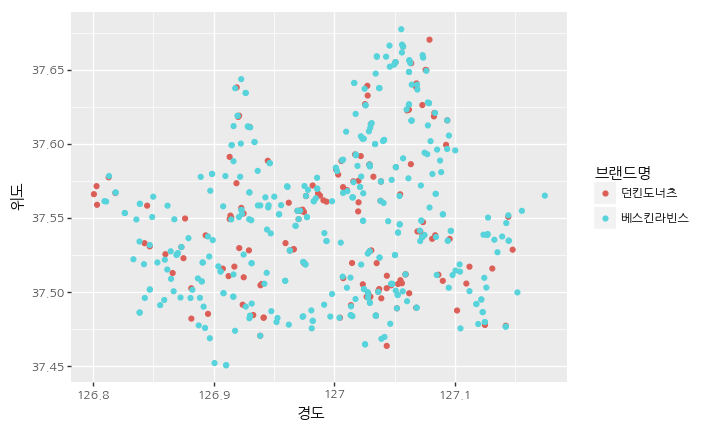

<ggplot: (-9223372036576632446)>

In [47]:
(ggplot(df_31)
 + aes(x='경도', y='위도', color='브랜드명')
 + geom_point()
 + theme(text=element_text(family='NanumGothicOTF'))
 + scale_fill_gradient2(low = 'blue', high = 'green')
)

In [48]:
# folium?

In [49]:
geo_df = df_31.copy()


def draw_marker():
    map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)
    for n in geo_df.index:
        popup_name = geo_df['브랜드명'][n] + ' - ' + geo_df['도로명주소'][n]
        if geo_df['브랜드명'][n] == '던킨도너츠':
            icon_color = 'pink'
        else:
            icon_color = 'blue'
        
        folium.Marker([geo_df['위도'][n], geo_df['경도'][n]],
                     popup=popup_name,
                     icon=folium.Icon(color=icon_color)).add_to(map)
    return map

In [50]:
draw_marker()

#  뚜레쥬르, 파리바게뜨 매장 입지 분석

In [56]:
df_bread = df_seoul.loc[
    df_seoul['상호명'].str.contains('뚜레(주르|쥬르)|파리(바게|크라상)') & (~df_seoul['상호명'].str.contains('파스(쿠찌|꾸찌)|잠바(쥬스|주스)'))
].copy()
df_bread.shape

/Users/seungmoo/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
/Users/seungmoo/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


(629, 39)

In [59]:
df_bread['상호명'].value_counts()

파리바게뜨                   199
뚜레쥬르                    122
파리크라상                    11
파리바게뜨월계미성                 2
파리바게뜨성북점                  2
씨제이뚜레쥬르                   2
파리바게뜨카페대학로점               2
파리바게뜨사당파스텔시티              1
파리바게뜨종로시그니처점              1
파리바게뜨고덕래미안힐스I점            1
뚜레쥬르엔시티보라매                1
파리바게뜨청담사거리점               1
파리바게뜨중계두타빌                1
파리바게뜨염창2호점                1
파리바게뜨중곡역점                 1
파리바게뜨신길돈보스코점              1
파리바게트곰달래                  1
씨제이푸드빌뚜레주르                1
파리바게뜨연희대우점                1
파리바게뜨방이1동점                1
파리바게뜨면목역점                 1
파리바게뜨수락리버시티               1
파리바게뜨온수남부점                1
파리바게뜨도봉1동점                1
파리바게뜨교육소                  1
뚜레쥬르명동역점                  1
파리바게뜨번동지점                 1
파리바게뜨신당역아크로점              1
파리바게뜨신촌현대                 1
파리바게뜨을지로3가역               1
파리바게뜨가락중앙점                1
뚜레쥬르시흥사거리점                1
파리바게뜨마포점                  1
뚜레쥬르용마산역점                 1
씨제이푸드빌뚜레쥬르대학              1
뚜레쥬르영등포역            

In [61]:
df_bread.loc[df_bread['상호명'].str.contains('파리(바게|크라상)'), '브랜드명'] = '파리바게뜨'
df_bread.loc[df_bread['상호명'].str.contains('뚜레(쥬|주)르'), '브랜드명'] = '뚜레쥬르'

/Users/seungmoo/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.
/Users/seungmoo/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [69]:
df_bread_group_count = df_bread['브랜드명'].value_counts().copy()
df_bread_group_count

파리바게뜨    434
뚜레쥬르     195
Name: 브랜드명, dtype: int64

In [65]:
434 + 195

629

In [66]:
df_bread.shape

(629, 40)

### 파리 바게뜨 매장이 뚜레주르 매장보다 2.2배 정도 더 많다.
spc 계열이 CJ 계열보다 공격적으로 점포확장을 하는걸까?

/Users/seungmoo/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/plotnine/guides/guides.py:198: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


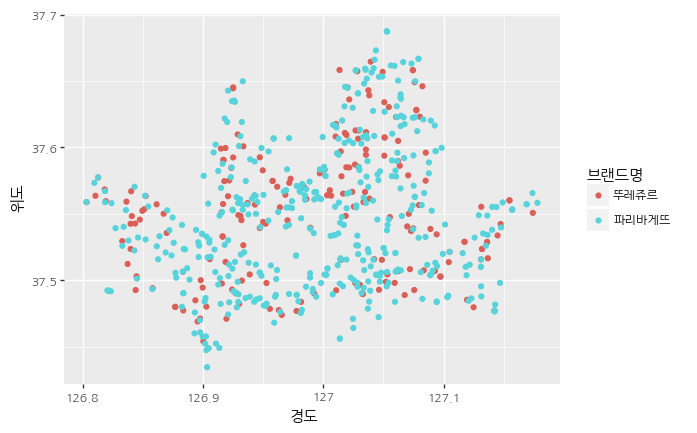

<ggplot: (-9223372036517548095)>

In [71]:
(ggplot(df_bread)
 + aes(x='경도', y='위도', color='브랜드명')
 + geom_point()
 + theme(text=element_text(family='NanumGothicOTF'))
 + scale_fill_gradient2(low = 'blue', high = 'green')
)

In [79]:
geo_df_bread = df_bread.copy()
map = folium.Map(location=[geo_df_bread['위도'].mean(), geo_df_bread['경도'].mean()], zoom_start=12)
for n in geo_df_bread.index:
    popup_name = geo_df_bread.loc[n, '브랜드명'] + '-' + geo_df_bread.loc[n, '도로명주소']
    if geo_df_bread.loc[n, '브랜드명'] == '뚜레쥬르':
        icon_color = 'green'
    else:
        icon_color = 'blue'
    
    folium.Marker([geo_df_bread.loc[n, '위도'], geo_df_bread.loc[n, '경도']],
                  popup=popup_name,
                  icon=folium.Icon(color=icon_color)).add_to(map)

map